In [398]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import classification_report
#from sklearn.ensemble import VotingClassifier, BaggingClassifier

In [399]:
df = pd.read_csv("../datasets/kc_house_data.csv")

In [400]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [401]:
original_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [402]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [403]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [404]:
###  완벽히 쓸모다고 판단되는 특성은 제외시키겠다(zipcode, id)
df = df.drop(["id", "zipcode"], axis=1)

In [405]:
df['date']=  pd.to_datetime(df['date'])

In [406]:
df['date'] = df['date'].apply(lambda x: x.strftime('%Y%m%d'))
df["date"] = df["date"].astype(int)

## 시계열 분석은 따로 공부해본적이 없다 일단 datetime, int형 둘다 써보는걸로

In [407]:
# 랜덤 포레스트를 쓸거란 가정하에 스케일링은 넘어가겠다
#from sklearn.preprocessing import StandardScaler

In [408]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)

# ###########특성공학부분################# 

In [409]:
### df를 그냥 건드리긴 할껀데 일단 y값은 시각화를 위해 필요하다
X, y = df.drop("price", axis=1), df["price"]

In [311]:
#일단 얘를 Bool형으로 바꿔주자
X["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [312]:
X["yr_renovated"] = X["yr_renovated"] != 0

In [313]:
X["yr_renovated"].value_counts()

False    20699
True       914
Name: yr_renovated, dtype: int64

C:\Users\hjhhi\real_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

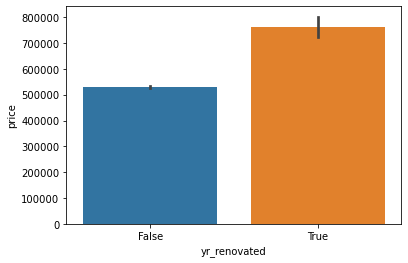

In [314]:
sns.barplot(X["yr_renovated"], y)

C:\Users\hjhhi\real_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

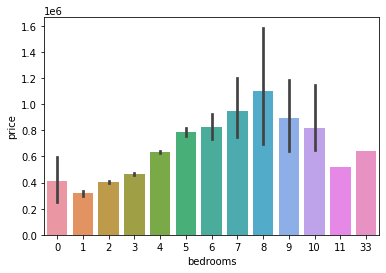

In [315]:
# 0아니면 8에 큰문제가 있다
sns.barplot(X["bedrooms"], y)

In [316]:
X["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [317]:
# 그래프 패턴이 좀 이상하니 9 이상, 1이하를 모아주자
X["bedrooms"][X["bedrooms"] > 6] =6
X["bedrooms"][X["bedrooms"] < 1] =1

<ipython-input-317-fa9c7d41378c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["bedrooms"][X["bedrooms"] > 6] =6
<ipython-input-317-fa9c7d41378c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["bedrooms"][X["bedrooms"] < 1] =1


C:\Users\hjhhi\real_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

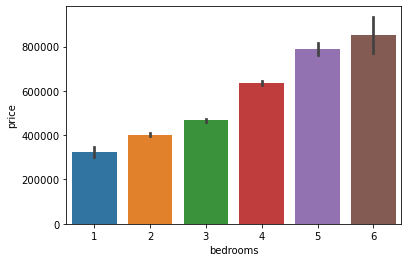

In [318]:
### 조금 더 봐줄만은하다
sns.barplot(X["bedrooms"], y)

In [289]:
X["lat"]

0        475
1        477
2        477
3        475
4        476
        ... 
21608    476
21609    475
21610    475
21611    475
21612    475
Name: lat, Length: 21613, dtype: int32

In [326]:
X["lat"] = X["lat"]*100
X["lat"] = X["lat"].astype(int)

In [327]:
X["lat"][X["lat"] < 4725] =4725

<ipython-input-327-397c49802ba4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["lat"][X["lat"] < 4725] =4725


In [338]:
X["long"].value_counts()

-1223    7129
-1221    4832
-1222    4809
-1220    2981
-1219     851
-1218     385
-1224     369
-1217     216
-1225      18
-1213      11
-1216       6
-1214       6
Name: long, dtype: int64

In [337]:
X["long"] = X["long"]*10
X["long"] = X["long"].astype(int)

In [340]:
X["long"][X["long"] > -1217] =-1217

<ipython-input-340-3c1f61092165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["long"][X["long"] > -1217] =-1217


C:\Users\hjhhi\real_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='long', ylabel='price'>

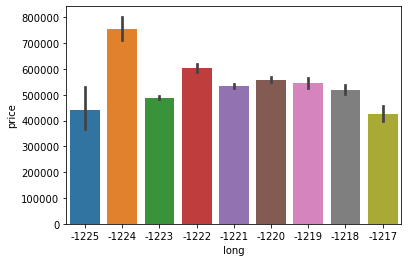

In [341]:
sns.barplot(X["long"], y)

In [359]:
X["sqft_lot"][X["sqft_lot"] > 25000] =25000

<ipython-input-359-0ac8043ebacc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sqft_lot"][X["sqft_lot"] > 25000] =25000


In [360]:
X["sqft_lot"]

0         5650
1         7242
2        10000
3         5000
4         8080
         ...  
21608     1131
21609     5813
21610     1350
21611     2388
21612     1076
Name: sqft_lot, Length: 21613, dtype: int64

In [387]:
X["date"]/10000

0        2014.1013
1        2014.1209
2        2015.0225
3        2014.1209
4        2015.0218
           ...    
21608    2014.0521
21609    2015.0223
21610    2014.0623
21611    2015.0116
21612    2014.1015
Name: date, Length: 21613, dtype: float64

In [388]:
X["temp"] = X["date"] /10000 -  X["yr_built"]

C:\Users\hjhhi\real_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr_built', ylabel='price'>

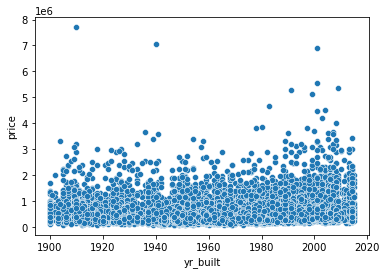

In [390]:
sns.scatterplot(X["yr_built"], y)

# 이 아래는 모델단이므로 하나하나 보면서 실행할 수 있을것

In [90]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# 일단 수시로 돌리며 테스트해볼 코드를 만들어 둔다
# 시간 단축을 위해 Train, test set으로 확인해보겠다

In [159]:
### 선형 관계에 대해 보고 싶을때 사용할 것

#temp=X
#temp["price"] = y
#print(df.corr()["price"].sort_values(ascending=False),temp.corr()["price"].sort_values(ascending=False))

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [411]:
rf = RandomForestRegressor()

In [412]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [413]:
predicted = rf.predict(X_test)

In [414]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)

In [415]:
rmse

113581.02808744155

In [416]:
importance = pd.DataFrame(X.columns, rf.feature_importances_)
print(importance.sort_index(ascending=False))

                      0
0.315622    sqft_living
0.269647          grade
0.164407            lat
0.073422           long
0.033094  sqft_living15
0.028532     waterfront
0.024981       yr_built
0.018582     sqft_above
0.014398     sqft_lot15
0.013175       sqft_lot
0.010764           date
0.010678           view
0.007414      bathrooms
0.005579  sqft_basement
0.002947      condition
0.002748       bedrooms
0.002126   yr_renovated
0.001885         floors


# 아랫단은 가장 마지막 테스트 코드이다

In [99]:
def displayscores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [ ]:
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", n_jobs = -1, cv=10)
displayscores(np.sqrt(-scores))

In [29]:
rf = RandomForestRegressor()

param_distribs = { 'n_estimators': range(1, 20, 5), 'max_features': range(1, 3),
                 'criterion':["squared_error", "absolute_error", "poisson"]}


clf = RandomizedSearchCV(
    rf, 
    param_distributions=param_distribs, 
    n_iter=3, 
    cv=3, 
    scoring='neg_mean_squared_error',  
    verbose=1,
    n_jobs=-1
)

In [30]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_features': range(1, 3),
                                        'n_estimators': range(1, 20, 5)},
                   scoring='neg_mean_squared_error', verbose=1)

In [32]:
clf.best_params_

{'n_estimators': 16, 'max_features': 1, 'criterion': 'absolute_error'}

### 성능이 별로라면 바로 다시다운받고 전처리로 돌아간다

In [ ]:
df = pd.read_csv("../datasets/kc_house_data.csv")

In [115]:
def score(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_train)
    lin_mse = mean_squared_error(model_pred, y_train)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

In [227]:
lasso = Lasso()
rand_forest = RandomForestRegressor()
sgd = SGDRegressor()

In [116]:
rf_params = [
{'n_estimators': [10, 25, 30], 'max_features': [3, 5, 10], 
 'max_depth': [10, 50,60,  None], 'bootstrap': [True, False]}
]
lasso_params=[
    {
        "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]
elastic_params = [
    {
         "alpha": [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
        "l1_ratio" : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, ]
    }
]

In [29]:
def tuneHyperparameters(model, params):

    gridSearch = GridSearchCV(model, params, verbose=0, cv=10, scoring="neg_mean_squared_error", n_jobs = -1)
    gridSearch.fit(X_train, y_train)
    bestParams, bestScore = gridSearch.best_params_,gridSearch.best_score_
    return bestScore, bestParams

In [30]:
model_names_to_tune = ["Random_forest","Lasso","Elastic"]
model_to_tune = [rand_forest, lasso, elastic]
model_params = [rf_params, lasso_params, elastic_params]
bestscores = list(map(tuneHyperparameters, model_to_tune, model_params))

C:\Users\hjhhi\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.929e+14, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\hjhhi\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 910.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hjhhi\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\model_selecti

In [31]:
bestscores

[(-16724701007.648636,
  {'bootstrap': True,
   'max_depth': 60,
   'max_features': 10,
   'n_estimators': 30}),
 (-40381142753.1988, {'alpha': 0.001}),
 (-40381013271.040855, {'alpha': 0.0001, 'l1_ratio': 0.6})]

In [64]:
X_train.drop(["sqft_living15", "sqft_basement"], axis=1)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_lot15,bed for living,lot_than_other
0,20141013,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,False,47.5112,-122.257,5650,393.333333,0.880597
1,20141209,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,True,47.7210,-122.319,7639,856.666667,1.520710
2,20150225,2,1.00,770,10000,1.0,0,0,3,6,770,1933,False,47.7379,-122.233,8062,385.000000,0.283088
3,20141209,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,False,47.5208,-122.393,5000,490.000000,1.441176
4,20150218,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,False,47.6168,-122.045,7503,560.000000,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,False,47.6993,-122.346,1509,510.000000,1.000000
21609,20150223,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,False,47.5107,-122.362,7200,577.500000,1.262295
21610,20140623,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,False,47.5944,-122.299,2007,510.000000,1.000000
21611,20150116,3,2.50,1600,2388,2.0,0,0,3,8,1600,2004,False,47.5345,-122.069,1287,533.333333,1.134752


In [65]:
estimator = RandomForestRegressor(bootstrap=False, max_depth=60, max_features=10, n_estimators=30)


In [117]:
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", n_jobs = -1, cv=10)

In [67]:
def displayscores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [68]:
rf_scores = np.sqrt(-scores)

In [69]:
displayscores(rf_scores)

Scores:  [136694.23131266 135914.55218769 112595.23930566 127388.82919814
 116932.75866091 139284.45183603 135418.96054287 122261.79091984
 127455.92582576 136964.68348471]
Mean:  129091.142327426
Standard deviation:  8845.656166906698


In [70]:
estimator.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features=10,
                      n_estimators=30)

In [71]:
pd.DataFrame(X_train.columns, estimator.feature_importances_)

,0
0.010122,date
0.003172,bedrooms
0.018694,bathrooms
0.276923,sqft_living
0.013875,sqft_lot
0.002181,floors
0.026506,waterfront
0.014895,view
0.003228,condition
0.206272,grade


### 특성공학 x rf평균이 약 13만정도 한 10만 아래를 타깃으로 잡아보면 될것같다
### 특성공학에 먼저 힘쓰고 모델은 마지막에 xgboost나 보팅, 앙상블부분 보고 4개를 한번에 수정해보자